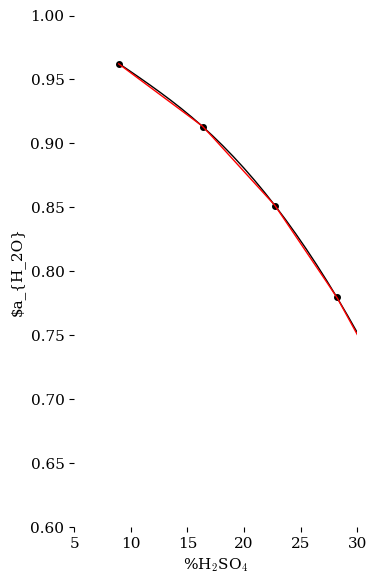

In [19]:
import pandas as pd
import numpy as np
from scipy.interpolate import make_smoothing_spline               # A function for interpolating a plot using a Bspline algorithm. Returns an interpolation function.
import matplotlib.pyplot as plt


#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
github_location = "./data/"
github_H0_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_08/data/H0_data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"




def MakeInterpolationFunctionForH2OActivityinH2SO4byPercentWt():
    Data_File_Name = "01_Giauque_Table9_activityH2OinH2SO4.csv"
    
    molwtH2SO4 = 98.08; molwtH20 = 18.0; densityH2SO4 = 1.83; densityH2O = 1.000
    
    Filename = github_location + Data_File_Name
    
    df1 = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    molal = df1["conc H2SO4 / m"]
    mass_add_to_1_kg_water = molal * molwtH2SO4
    total_mass_solution = mass_add_to_1_kg_water + 1000
    percent_H2SO4 = mass_add_to_1_kg_water / total_mass_solution * 100
    
    df1["%H2SO4"] = percent_H2SO4
    df1["mole fraction"] = molal / (molal + 1000/molwtH20)
    
    x = df1["%H2SO4"]
    y = df1["aH2O"]


    
    interpolation = make_smoothing_spline(x, y,      ### The x and y data
                                          w=None,    ### A list of weights for each point (default = None)
                                          lam=5)     ### A factor for the degree of smoothing. Change this to change the smoothness.
    
    return(interpolation)

def DataForInterpolateH2OActivitybyPercentWtH2SO4():
    Data_File_Name = "01_Giauque_Table9_activityH2OinH2SO4.csv"
    
    molwtH2SO4 = 98.08; molwtH20 = 18.0; densityH2SO4 = 1.83; densityH2O = 1.000
    
    Filename = github_location + Data_File_Name
    
    df1 = pd.read_csv(Filename, 
                     delimiter = ",", 
                     skipinitialspace=True, 
                     comment = "#") 
    
    molal = df1["conc H2SO4 / m"]
    mass_add_to_1_kg_water = molal * molwtH2SO4
    total_mass_solution = mass_add_to_1_kg_water + 1000
    percent_H2SO4 = mass_add_to_1_kg_water / total_mass_solution * 100
    
    df1["%H2SO4"] = percent_H2SO4
    
    x = df1["%H2SO4"]
    y = df1["aH2O"]
    
    return(x,y)


Data_File_Name = "01_Giauque_Table9_activityH2OinH2SO4.csv"

Filename = github_location + Data_File_Name

df = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 comment = "#")     

interpolator = MakeInterpolationFunctionForH2OActivityinH2SO4byPercentWt()
x1 = df["%H2SO4"] 
x = np.linspace(min(x1), max(x1), 100)   # Create an array of 500 points between the min and max x values  
y = interpolator(x) 

style_file = "tufte.mplstyle"
#style_file = "S2_classic2.mplstyle"
#plt.style.use(github_location_styles + style_file)        



fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.90,5.97))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   
ax.set(ylabel=r"$a_{H_2O}", 
   xlabel=r"%H$_2$SO$_4$",
   ylim=[0.6,1],                  
   xlim=[5,30]
   )

ax.plot(df["%H2SO4"], df["aH2O"], 'o', color='black', markersize=4, label="Data from Giauque (1940)")
ax.plot(x, y, '-', color='black', markersize=4, label="Data from Giauque (1940)")

y = np.interp(x, df["%H2SO4"], df["aH2O"])
ax.plot(x, y, '-', color='red', markersize=4, label="Data from Giauque (1940)")
